In [1]:
from googleapiclient.discovery import build
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
api_service_name = "youtube"
api_version = "v3"
api_key = '你的金鑰'
youtube = build(api_service_name, api_version, developerKey = api_key)

In [3]:
channel_data = pd.read_excel('YouTube API Practice01.xlsx', index_col=0)
channel_data

,Channel_name,Description,Published,Country,Subscribers,Views,Playlist,VideoCount,Channel_topic,Image,Keywords
0,Ado,元気です。,2018-08-18T02:02:50Z,JP,3970000,1376983894,UUln9P4Qm3-EAY4aiEPmRwEA,80,"['Music_of_Asia', 'Pop_music', 'Music', 'Rock_...",https://yt3.ggpht.com/I3ckNVLPQq04aQklOnRctTEn...,"アド あぼ ado ""アド 歌い手"" ADO Ado ""Ado TikTok"" ""アド ティ..."


In [4]:
playlist_id = channel_data.loc[channel_data['Channel_name']=='Ado', 'Playlist'].iloc[0]
playlist_id

'UUln9P4Qm3-EAY4aiEPmRwEA'

In [5]:
def get_video_ids(youtube, playlist_id):
    
    request = youtube.playlistItems().list(
              part = 'contentDetails',
              playlistId = playlist_id,
              maxResults = 50) # 50 is max
    response = request.execute()
    
    video_ids = []
    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])
        
    next_page_token = response.get('nextPageToken')
    more_pages = True
    
    while more_pages: 
        if next_page_token is None:
            more_pages = False
        else: # json存在nextPageToken，透過以下取得50以上的videos
            request = youtube.playlistItems().list(
                    part = 'contentDetails',
                    playlistId = playlist_id,
                    pageToken = next_page_token)
            response = request.execute()
            for i in range(len(response['items'])):
                video_ids.append(response['items'][i]['contentDetails']['videoId'])
            next_page_token = response.get('nextPageToken')
    print('影片數量:', len(video_ids))
    return video_ids

In [6]:
video_ids01 = get_video_ids(youtube, playlist_id)

影片數量: 88


In [8]:
# video_ids01

In [9]:
def get_channel_video_detail(youtube, video_ids):
    
    all_video_stats = []
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
        part = 'snippet, statistics, topicDetails',
        id=','.join(video_ids[i:i+50]))
        response = request.execute()
        for video in response['items']:
            video_stats = dict(Title = video['snippet']['title'],
                               Description = video['snippet']['description'],
                               PublishedAt = video['snippet']['publishedAt'],
                               Language = '',
                               Views = video['statistics']['viewCount'],
                               Likes = video['statistics']['likeCount'],
                               CommentCount = '',
                               Image = video['snippet']['thumbnails']['high']['url'],
                               Tags = '',
                               Topic = '')
            if 'tags' in video['snippet']:video_stats['Tags'] = video['snippet']['tags']
            if 'topicDetails' in video:video_stats['Topic'] = video['topicDetails']['topicCategories']
            if 'defaultAudioLanguage' in video['snippet']:video_stats['Language'] = video['snippet']['defaultAudioLanguage']
            if 'commentCount' in video['statistics']:video_stats['CommentCount'] = video['statistics']['commentCount']
            all_video_stats.append(video_stats)
    return all_video_stats

In [12]:
video_details01 = get_channel_video_detail(youtube, video_ids01)

In [13]:
data_ado = pd.DataFrame(video_details01)
data_ado.head()

,Title,Description,PublishedAt,Language,Views,Likes,CommentCount,Image,Tags,Topic
0,【Ado】行方知れず,地獄と天国のスパイ\n\n行方知れず Streaming & Download ▶︎ htt...,2022-10-10T11:00:14Z,ja,1439128,83931,2458,https://i.ytimg.com/vi/VQtmqpSE64w/hqdefault.jpg,,"[https://en.wikipedia.org/wiki/Music, https://..."
1,sakiyamaさんにジャケ&MVを担当いただきました,,2022-10-06T11:38:44Z,ja,116941,9552,174,https://i.ytimg.com/vi/pE6QEvqUDsU/hqdefault.jpg,,
2,Chinozoさんに書き下ろしていただきました,,2022-10-05T12:33:32Z,ja,118584,10927,183,https://i.ytimg.com/vi/IclAKUzds_U/hqdefault.jpg,,
3,映画「カラダ探し」について,,2022-10-04T11:21:43Z,ja,149822,13972,211,https://i.ytimg.com/vi/_8srCvMkVX8/hqdefault.jpg,,
4,椎名林檎さんに書き下ろしていただきました,,2022-10-03T11:29:05Z,ja,279211,26116,469,https://i.ytimg.com/vi/GhejijASk_Q/hqdefault.jpg,,


In [10]:
def get_topic(df):
    col = []
    topic = []
    for i in df['Topic']:
        if i == '':
            col.append('')
        else:
            for j in range(len(i)):
                topic.append(i[j].split('/')[4])
            col.append(topic)
            topic = []
    df['Topic'] = col
    return df.head()

In [11]:
get_topic(data_ado)

,Title,Description,PublishedAt,Language,Views,Likes,CommentCount,Image,Tags,Topic
0,【Ado】行方知れず,地獄と天国のスパイ\n\n行方知れず Streaming & Download ▶︎ htt...,2022-10-10T11:00:14Z,ja,1421610,83563,2450,https://i.ytimg.com/vi/VQtmqpSE64w/hqdefault.jpg,,"[Music, Music_of_Asia, Rock_music]"
1,sakiyamaさんにジャケ&MVを担当いただきました,,2022-10-06T11:38:44Z,ja,116635,9535,174,https://i.ytimg.com/vi/pE6QEvqUDsU/hqdefault.jpg,,
2,Chinozoさんに書き下ろしていただきました,,2022-10-05T12:33:32Z,ja,118452,10924,182,https://i.ytimg.com/vi/IclAKUzds_U/hqdefault.jpg,,
3,映画「カラダ探し」について,,2022-10-04T11:21:43Z,ja,149696,13960,211,https://i.ytimg.com/vi/_8srCvMkVX8/hqdefault.jpg,,
4,椎名林檎さんに書き下ろしていただきました,,2022-10-03T11:29:05Z,ja,278951,26093,469,https://i.ytimg.com/vi/GhejijASk_Q/hqdefault.jpg,,


In [14]:
def columns_type_format(df):
    df['PublishedAt'] = pd.to_datetime(df['PublishedAt']).dt.date
    df['Views'] = pd.to_numeric(df['Views'])
    df['Likes'] = pd.to_numeric(df['Likes'])
    df['CommentCount'] = pd.to_numeric(df['CommentCount'])
    return df.head()

In [15]:
columns_type_format(data_ado)

,Title,Description,PublishedAt,Language,Views,Likes,CommentCount,Image,Tags,Topic
0,【Ado】行方知れず,地獄と天国のスパイ\n\n行方知れず Streaming & Download ▶︎ htt...,2022-10-10,ja,1439128,83931,2458,https://i.ytimg.com/vi/VQtmqpSE64w/hqdefault.jpg,,"[https://en.wikipedia.org/wiki/Music, https://..."
1,sakiyamaさんにジャケ&MVを担当いただきました,,2022-10-06,ja,116941,9552,174,https://i.ytimg.com/vi/pE6QEvqUDsU/hqdefault.jpg,,
2,Chinozoさんに書き下ろしていただきました,,2022-10-05,ja,118584,10927,183,https://i.ytimg.com/vi/IclAKUzds_U/hqdefault.jpg,,
3,映画「カラダ探し」について,,2022-10-04,ja,149822,13972,211,https://i.ytimg.com/vi/_8srCvMkVX8/hqdefault.jpg,,
4,椎名林檎さんに書き下ろしていただきました,,2022-10-03,ja,279211,26116,469,https://i.ytimg.com/vi/GhejijASk_Q/hqdefault.jpg,,


In [18]:
top10_videos = data_ado.sort_values(by='Views', ascending=False).head(10)
top10_videos

,Title,Description,PublishedAt,Language,Views,Likes,CommentCount,Image,Tags,Topic
63,【Ado】うっせぇわ,正しさとは 愚かさとは それが何か見せつけてやる \n\nダウンロード/ストリーミング配信は...,2020-10-23,ja,247916111,2371962,230765,https://i.ytimg.com/vi/Qp3b-RXtz4w/hqdefault.jpg,"[Ado, うっせぇわ, syudou, WOOMA, Naoki Itai, ORIHAR...",[https://en.wikipedia.org/wiki/Electronic_musi...
54,【Ado】踊,ﾉヽ･/ ﾉヽ° 👾ﾅょら ⓚⓞーー💥🤟💙 🌴👽笑笑 \n\nStreaming & Dow...,2021-04-27,ja,151231037,1451801,59850,https://i.ytimg.com/vi/YnSW8ian29w/hqdefault.jpg,,[https://en.wikipedia.org/wiki/Electronic_musi...
56,【Ado】ギラギラ,もしも神様が左利きならどんなに幸せか知れない\n\nダウンロード/ストリーミング配信はこちら...,2021-02-14,ja,124607053,1000374,42396,https://i.ytimg.com/vi/sOiMD45QGLs/hqdefault.jpg,,[https://en.wikipedia.org/wiki/Independent_mus...
18,【Ado】新時代 (ウタ from ONE PIECE FILM RED),「ボクを信じて」\n\n▼新時代 Streaming & Download\nhttps:/...,2022-06-15,ja,75602174,1028490,28665,https://i.ytimg.com/vi/1FliVTcX8bQ/hqdefault.jpg,,"[https://en.wikipedia.org/wiki/Music, https://..."
59,【Ado】レディメイド,大人にだけはなりたくなんかない\n\nダウンロード/ストリーミング配信はこちら：https:...,2020-12-24,ja,68119287,675467,19219,https://i.ytimg.com/vi/jg09lNupc1s/hqdefault.jpg,"[Ado, レディメイド, うっせぇわ, アド, Ado 歌い手, 歌い手 Ado, Abo...","[https://en.wikipedia.org/wiki/Music, https://..."
37,【Ado】阿修羅ちゃん,ねえ、ギャーギャー言っちゃって\n\nテレビ朝日系木曜ドラマ『ドクターX～外科医・大門未知子...,2021-10-28,ja,60864161,636229,14396,https://i.ytimg.com/vi/cyq5-StPISU/hqdefault.jpg,,"[https://en.wikipedia.org/wiki/Music, https://..."
16,【Ado】逆光（ウタ from ONE PIECE FILM RED）,そりゃあ愛への罰だ\n\n▼逆光 Streaming & Download\nhttps:/...,2022-07-06,ja,44816953,655507,15283,https://i.ytimg.com/vi/gt-v_YCkaMY/hqdefault.jpg,,"[https://en.wikipedia.org/wiki/Music, https://..."
61,【Ado】ラブカ？ 歌いました,柊キライ様の ラブカ？ を歌わせていただきました。\n\n曲/柊キライ様 @Kirai_da...,2020-12-11,ja,37836371,466665,12199,https://i.ytimg.com/vi/YTQV48V44Sw/hqdefault.jpg,"[歌ってみた, 歌い手, ado, Ado, Ado 歌い手, Ado 歌ってみた, Abo...",[https://en.wikipedia.org/wiki/Independent_mus...
12,【Ado】ウタカタララバイ（ウタ from ONE PIECE FILM RED）,わたしがやらなきゃ だから邪魔しないで お願い...\n\n▼『ウタカタララバイ』 Stre...,2022-08-06,ja,35338751,492958,10432,https://i.ytimg.com/vi/hyV1AJiFNyo/hqdefault.jpg,,"[https://en.wikipedia.org/wiki/Music, https://..."
9,【Ado】Tot Musica（ウタ from ONE PIECE FILM RED）,求められたる救世主\n\n▼『Tot Musica』 Streaming & Downloa...,2022-08-17,ja,34174705,809864,19529,https://i.ytimg.com/vi/V9_ZpqfqHFI/hqdefault.jpg,,"[https://en.wikipedia.org/wiki/Music, https://..."


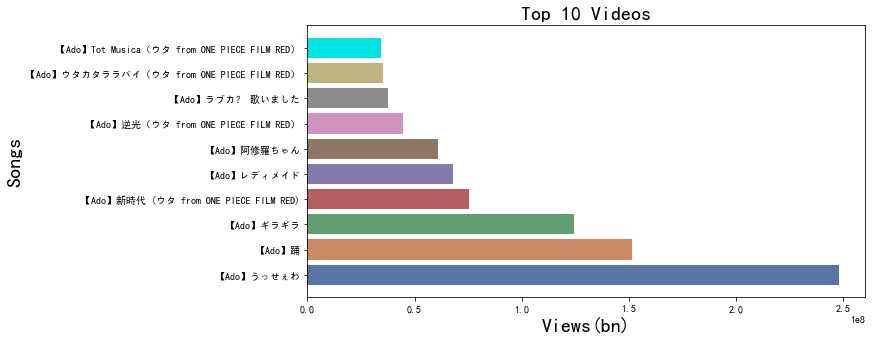

In [20]:
fig = plt.figure(figsize=(10, 5)) 
# ['#5975a4', '#cc8963', '#5f9e6e', '#b55e60', '#857aab', '#8d7866', '#d095bf', '#8c8c8c', '#c1b37f', '#00E3E3']
color = ['#5975a4', '#cc8963', '#5f9e6e', '#b55e60', '#857aab', '#8d7866', '#d095bf', '#8c8c8c', '#c1b37f', '#00E3E3']
# creating the bar plot 
plt.barh(top10_videos['Title'], top10_videos['Views'], color=color)
plt.xlabel("Views(bn)",fontsize=20) 
plt.ylabel("Songs",fontsize=20) 
plt.title("Top 10 Videos",fontsize=20)
plt.show()

In [22]:
from collections import Counter
all_terms = []
for terms in data_ado['Tags']:
    all_terms.extend(terms)
sorted(dict(Counter(all_terms)).items(), key=lambda x:x[1], reverse=True)

[('Ado', 37),
 ('歌ってみた', 23),
 ('アド', 22),
 ('Abo', 22),
 ('Ado 歌い手', 21),
 ('Wac', 14),
 ('あぼ', 13),
 ('Ado 歌ってみた', 13),
 ('歌い手', 11),
 ('歌い手 Ado', 10),
 ('あぼ 歌い手', 9),
 ('あど', 7),
 ('ado', 7),
 ('Abo 歌い手', 7),
 ('うっせぇわ', 4),
 ('エイド', 4),
 ('高校生', 4),
 ('abo', 3),
 ('Naoki Itai', 3),
 ('ORIHARA', 3),
 ('WOOMA', 3),
 ('syudou', 3),
 ('戸部じろ', 3),
 ('初音ミク', 3),
 ('人狼', 2),
 ('うた', 2),
 ('高校生 歌ってみた', 2),
 ('ADO', 2),
 ('レディメイド', 2),
 ('ミク', 2),
 ('すりぃ', 2),
 ('アド 歌い手', 2),
 ('エイド 歌い手', 2),
 ('中山明飛', 2),
 ('馬鹿', 2),
 ('とべじろ', 2),
 ('中山 明飛', 2),
 ('ワック', 2),
 ('ado 歌ってみた', 2),
 ('オリジナルMV', 2),
 ('Ado(歌い手)', 2),
 ('Ado（歌い手）', 2),
 ('脳内革命ガール', 2),
 ('Mr.シャーデンフロイデ', 1),
 ('ひとしずく', 1),
 ('やま', 1),
 ('ひとしずく×やま', 1),
 ('ひとしずく×やま△', 1),
 ('黒うさぎ', 1),
 ('吉乃', 1),
 ('弱酸性', 1),
 ('GooDrug', 1),
 ('綴', 1),
 ('ひとでちゃん', 1),
 ('橘うた', 1),
 ('・o・', 1),
 ('えりあす', 1),
 ('さぶろう', 1),
 ('yoshimura feat.yoshimura', 1),
 ('よしむら', 1),
 ('schadenfreude', 1),
 ('Mr.', 1),
 ('Mr.schadenfreude', 1),
 ('ぐっどらっぐ', 1),
 (

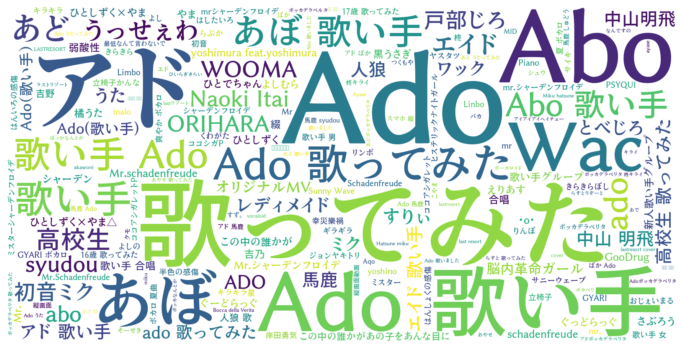

In [23]:
from wordcloud import WordCloud
from PIL import Image
from os import path
# mask = np.array(Image.open("wordcloud.png"))
font_path = 'GenEiAntiquePv5-M.ttf'
wc = WordCloud(width=1600, height=800, background_color='white', font_path = font_path)
wc.generate_from_frequencies(frequencies=dict(Counter(all_terms)))
plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()